# Toy example
This notebook reproduces the results of our paper **"From unbiased to maximal entropy random walks on hypergraphs"** regarding the toy example of section  IV.A.1.
You can find the toy example below:

![alt text](Toy-NEW_page-0001.jpg "Toy Hypergraph") 

The motivation behind the toy model is to emphasize if different types of random walks are able to distinguish a higher-order structure, a hyperedge, from its pairwise counterpart, a clique here denoted by $\mathcal{E}^{\boxtimes} = \{1,2,3,4\}$

In [1]:
# set parent directory, run only once
import os
os.chdir('../')

In [2]:
from utils import HypergraphModels as HM
from utils import HypergraphStructure as HS
from utils import HypergraphRW as HRW
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

plt.rcParams.update({'font.size': 16})
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'

colors = [ (44/255,144/255,177/255,255/255), (155/255,164/255,215/255,255/255),(91/255,198/255,229/255,255/255),(229/255,175/255,105/255,255/255)]

In [3]:
hyperedges = [[1,2],
              [1,3],
              [1,4],
              [2,3],
              [2,4],
              [3,4],
              [4,5,6,7],
              [7,8,9,10],
              [10,11,12,13]]

# covert to numpy.array, add the cardinality, and start counting from zero (that is why -1)
H = np.array([np.insert(e,0,len(e)+1) for e in hyperedges],dtype=object) - 1
N = 13

### Figure 2:
Graphical representation of the adjacency and probability transition matrices for the toy's  example. In (a), (c), and (e) we show the matrices related to the higher-order step, while in (b), (d), and (f) the projected step. In (a) and (b) the adjacency matrices, $\mathbf{A}^{norm}$ and $\mathbf{A}^{count}$ respectively. In (c) and (d) the unbiased random walk probability transition matrix, $\mathcal{P}^{URW}$, while in (e) and (f) the maximum entropy random walk transition matrix, $\mathcal{P}^{MERW}$.

In [4]:
# two types of steps: ho (higher-order) and p (projected)
A_ho = HS.Adjacency_HE_Normalized(H,N)
A_p = HS.Adjacency_Count(H,N)

# probability matrix for urw (unbiased random walk)
P_ho_urw = HS.Probability_Transition(A_ho,rw_type='URW')
P_p_urw = HS.Probability_Transition(A_p,rw_type='URW')

# probability matrix for merw (maximal random walk)
P_ho_merw = HS.Probability_Transition(A_ho,rw_type='MERW')
P_p_merw = HS.Probability_Transition(A_p,rw_type='MERW')

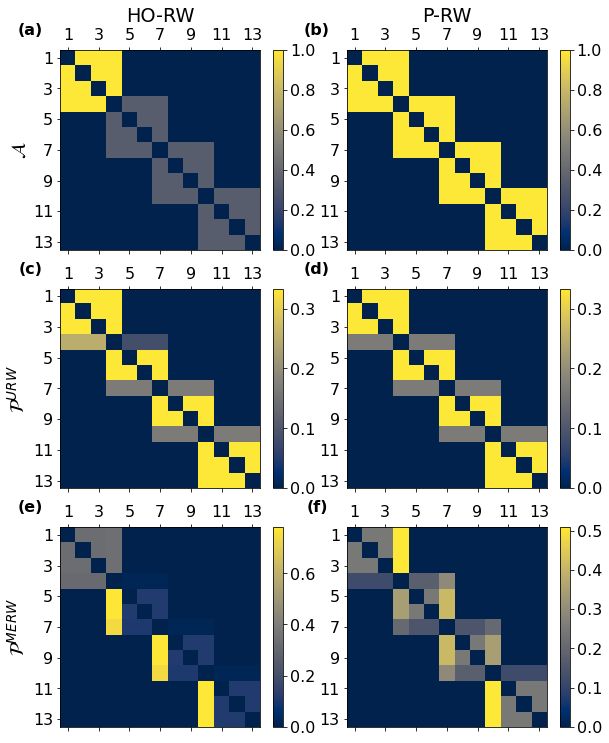

In [5]:
# plot!

fig, axs = plt.subplots(3, 2, figsize=(8,10))

for i,matrix in enumerate([A_ho,A_p,P_ho_urw,P_p_urw,P_ho_merw,P_p_merw]):
    ms = axs[i//2,i%2].matshow(matrix, cmap=plt.cm.cividis)
    axs[i//2,i%2].set_xticks(np.arange(0, 14, step=2))
    axs[i//2,i%2].set_yticks(np.arange(0, 14, step=2))
    axs[i//2,i%2].set_xticklabels(np.arange(1, 14, step=2))
    axs[i//2,i%2].set_yticklabels(np.arange(1, 14, step=2))
    fig.colorbar(ms, ax=axs[i//2,i%2], orientation='vertical')

axs[0,0].text(-0.15, 1.075, "(a)", fontweight='semibold' , ha="center", transform=axs[0,0].transAxes)
axs[0,1].text(-0.15, 1.075, "(b)", ha="center", transform=axs[0,1].transAxes, fontweight='semibold')

axs[1,0].text(-0.15, 1.075, "(c)", ha="center", transform=axs[1,0].transAxes, fontweight='semibold')
axs[1,1].text(-0.15, 1.075, "(d)", ha="center", transform=axs[1,1].transAxes, fontweight='semibold')

axs[1,0].text(-0.15, 1.075, "(e)", ha="center", transform=axs[2,0].transAxes, fontweight='semibold')
axs[1,1].text(-0.15, 1.075, "(f)", ha="center", transform=axs[2,1].transAxes, fontweight='semibold')

axs[0,0].set_title("HO-RW", fontweight='medium')
axs[0,1].set_title("P-RW", fontweight='medium')

axs[0,0].set_ylabel(r'$\mathcal{A}$',fontsize = 'large')
axs[1,0].set_ylabel(r'$\mathcal{P}^{URW}$',fontsize = 'large')
axs[2,0].set_ylabel(r'$\mathcal{P}^{MERW}$',fontsize = 'large')

fig.subplots_adjust(
top=0.955,
bottom=0.015,
left=0.03,
right=0.98,
hspace=0.195,
wspace=0.1
)


#plt.savefig('plots/Toy_A_P.pdf')
plt.show()

### Figure 3:
Toy’s example stationary distribution for the unbiased random walk with the higher-order step in (a), the maximal entropy with the same step in (b), the unbiased random walk with projected step in (c), and the maximal entropy random walk with the same step in (d).

In [6]:
# pi = stationary distribution for urw (unbiased random walk)
pi_ho = HS.get_stationary_distribution(A_ho,rw_type='URW')
pi_p = HS.get_stationary_distribution(A_p,rw_type='URW')

# phi = stationary distribution for merw (maximal entropy random walk)
phi_ho = HS.get_stationary_distribution(A_ho,rw_type='MERW')
phi_p = HS.get_stationary_distribution(A_p,rw_type='MERW')

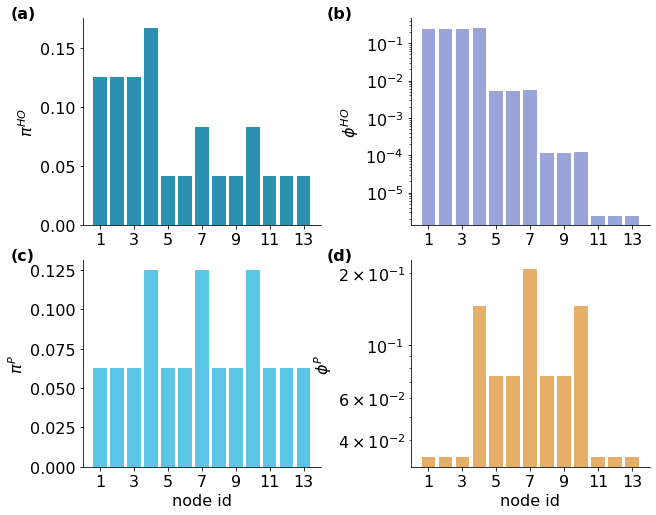

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))
labels = [r'$\pi^{HO}$',r'$\phi^{HO}$',r'$\pi^{P}$',r'$\phi^{P}$']

for i,y in enumerate([pi_ho, phi_ho, pi_p, phi_p]):
    axs[i//2,i%2].bar(np.arange(1, 14, step=1), y, color=colors[i])
    axs[i//2,i%2].set_ylabel(labels[i])
    axs[i//2,i%2].set_xticks(np.arange(1, 14, step=2))

axs[0,1].text(-0.3, 1., "(b)", ha="center", transform=axs[0,1].transAxes, fontweight='semibold')
axs[0,0].text(-0.25, 1., "(a)", ha="center", transform=axs[0,0].transAxes,fontweight='semibold')
axs[1,1].text(-0.3, 1., "(d)", ha="center", transform=axs[1,1].transAxes, fontweight='semibold')
axs[1,0].text(-0.25, 1., "(c)", ha="center", transform=axs[1,0].transAxes, fontweight='semibold')

axs[1,1].set_xlabel('node id') 
axs[1,0].set_xlabel('node id') 


axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')

fig.subplots_adjust(
top=0.975,
bottom=0.085,
left=0.115,
right=0.99,
hspace=0.17,
wspace=0.375
)

sb.despine()    
#plt.savefig('plots/Toy_Densities.pdf')
plt.show()

### Figure 4:
Toy's  example hitting times, $T_{ij}$, for the different types of random walk studied. In (a) and (c) for the unbiased random walk and in (b) and (d) for the maximum entropy random walk. Complementary, in (a) and (b) the higher-order step, while in (c) and (d) the projected step.

In [10]:
# Tij_urw = expected time to hit j starting from i, for urw (unbiased random walk)
Tij_urw_ho = HRW.Tij_urw(HS.Laplacian(A_ho))
Tij_urw_p = HRW.Tij_urw(HS.Laplacian(A_p))
# Tij_merw = expected time to hit j starting from i, for merw (maximal entropy random walk)
Tij_merw_ho = HRW.Tij_merw(A_ho)
Tij_merw_p = HRW.Tij_merw(A_p)

/var/folders/0y/m3w_bt6d1sd8qg6hy8mxjgfr0000gn/T/ipykernel_1977/1567416270.py:6: RuntimeWarning: divide by zero encountered in log10
  ms = axs[i//2,i%2].matshow(np.log10(y), cmap=plt.cm.cividis)


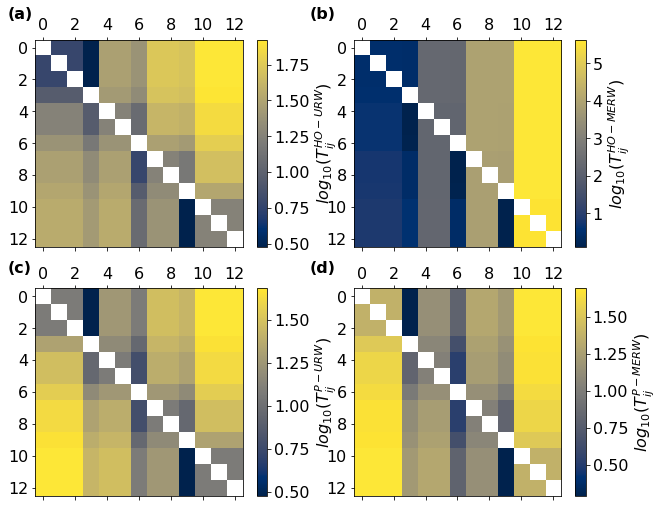

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))
labels = [r'$log_{10}(T_{ij}^{HO-URW})$',r'$log_{10}(T_{ij}^{HO-MERW})$',
          r'$log_{10}(T_{ij}^{P-URW})$',r'$log_{10}(T_{ij}^{P-MERW})$']

for i,y in enumerate([Tij_urw_ho, Tij_merw_ho, Tij_urw_p, Tij_merw_p]):
    ms = axs[i//2,i%2].matshow(np.log10(y), cmap=plt.cm.cividis)
    cb = fig.colorbar(ms, ax=axs[i//2,i%2], orientation='vertical')
    cb.set_label(labels[i])
    axs[i//2,i%2].set_xticks(np.arange(0, 14, step=2))
    axs[i//2,i%2].set_xticklabels(np.arange(0, 14, step=2))
    axs[i//2,i%2].set_yticks(np.arange(0, 14, step=2))
    axs[i//2,i%2].set_yticklabels(np.arange(0, 14, step=2))

axs[0,0].text(-0.075, 1.1, "(a)", ha="center", transform=axs[0,0].transAxes,fontweight='semibold')
axs[0,1].text(-0.15, 1.1, "(b)", ha="center", transform=axs[0,1].transAxes,fontweight='semibold')
axs[1,0].text(-0.075, 1.075, "(c)", ha="center", transform=axs[1,0].transAxes,fontweight='semibold')
axs[1,1].text(-0.15, 1.075, "(d)", ha="center", transform=axs[1,1].transAxes,fontweight='semibold')

fig.subplots_adjust(
top=0.925,
bottom=0.02,
left=0.015,
right=0.945,
hspace=0.2,
wspace=0.12
)

#plt.savefig('plots/Toy_Tij.pdf')
plt.show()
